# Running Power and Race Time Prediction

Jack Miller

April 5, 2023

Most equations taken from:

- Van Dijk, H., & Van Megan, R. (2017). The Secret of Running. Meyer & Meyer Sport.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Running Power Model

- A running power model is used to calculate the power required to run a pace on a given course

In [2]:
import matplotlib.pyplot as plt
import sys
import os
module_path = os.path.abspath(os.path.join('../source'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import bonk
plotSize = (12,8)

athlete = bonk.Athlete()
environment = bonk.Environment()

### Power to Maintain Constant Velocity on Flat Ground
$$    {P_{base}} = {c}{m}{v}    $$

where ${c}$ = energy cost of running (Ecor)

${v}$ = running speed, ${m}$ is mass

### Energy Cost of Running

- Ecor varies slightly from runner to runner and represents the velocity independent energy required to travel a certain distance per unit mass. Ecor is closely related to the term "running economy"

- In standard conditions, Ecor ranges +/- a few percent, with a typical value of 0.98 kj/km/kg. It can be measured in a lab.

- Ecor lumps together many hard to measure elements like internal work and the fraction energy recovery due to spring action of tendons.

- Future improvements to the model should include a model of Ecor. For now Ecor is scaled with gravity to account for the fact that the majority of Ecor comes from center of mass vertical motion (changing gravitational potential energy).

### Power due to Aerodynamic Drag
$$    {P_{drag}} = {\frac{1}{2}}{\rho}{C_{d}}{A}{(v+v_{wind})}^2{v}    $$

where ${v_{wind}}$ is headwind speed (negative values are tailwind)

${\rho}$ is air density
${C_{d}}$ is drag coefficient
${A}$ is frontal area



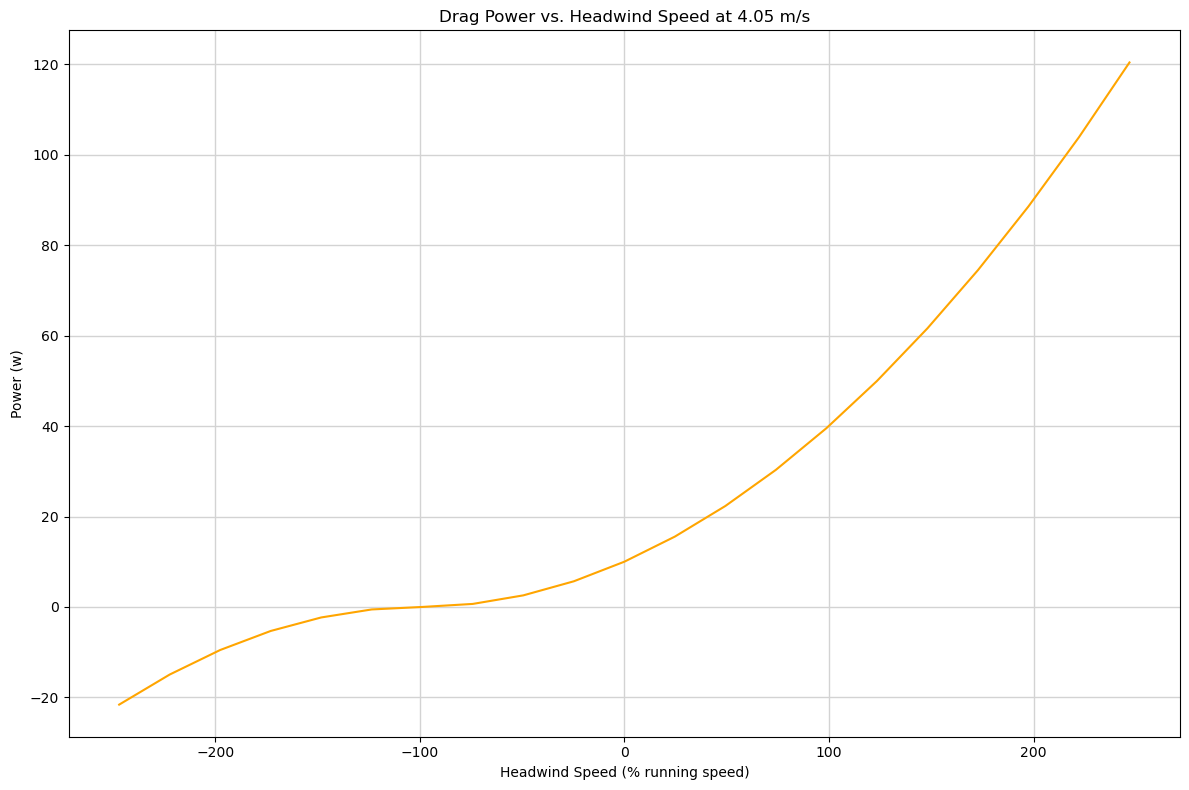

In [3]:
bonk.plotDragPower(environment, athlete, 4.05)

### Power due to Slope

$$    {P_{slope}} = {{m}{g}{s}{\eta}{v}}    $$

${m}$ is mass, ${g}$ is acceleration due to gravity, ${s}$ is slope

${\eta}$ is hill factor, ${v}$ is running speed

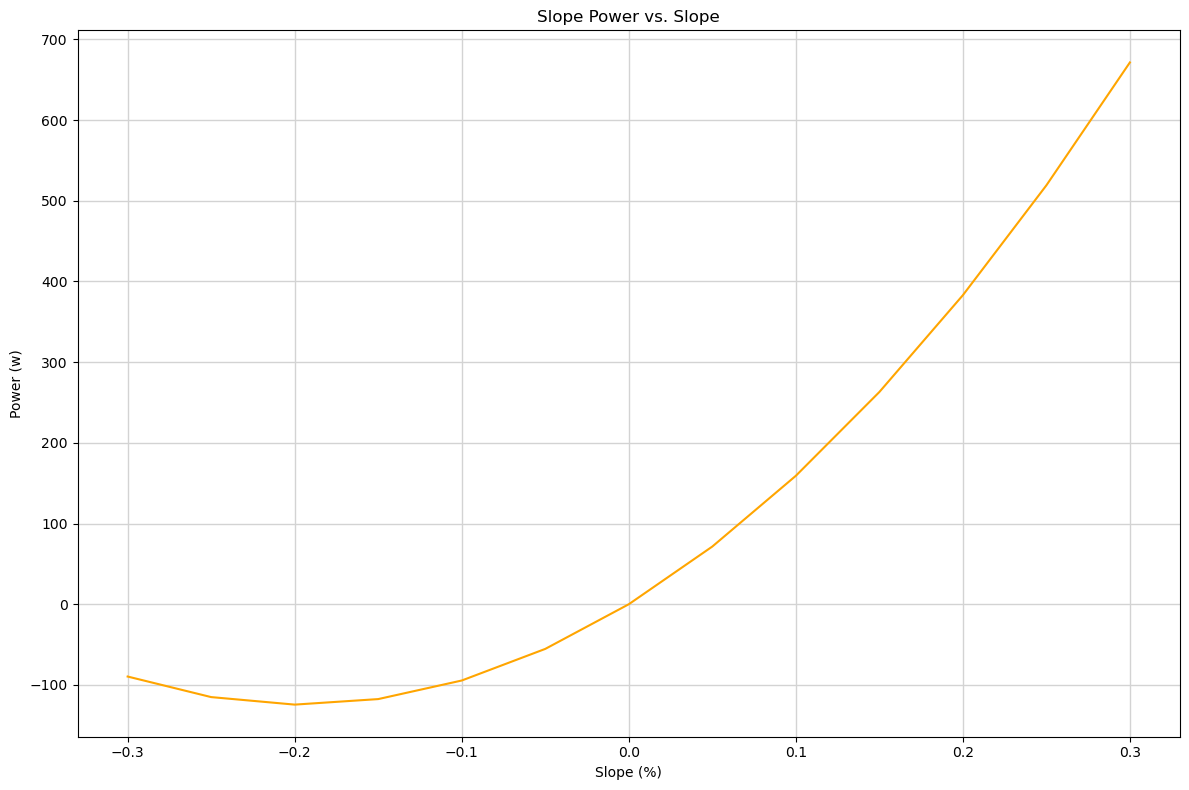

In [4]:
bonk.plotSlopePower(environment, athlete, 4.05)



#### Hill Factor

- Slope power is lower than expected due to differences in muscular efficiency
    - Muscle efficiency is higher during climbing than descending
    - At extreme negative slopes power is consumed due to braking

$$ {\eta} = \frac{P_{real}}{P_{theory}}{100} $$


$$ {\eta} = {45.6}+{1.1622}{s} $$

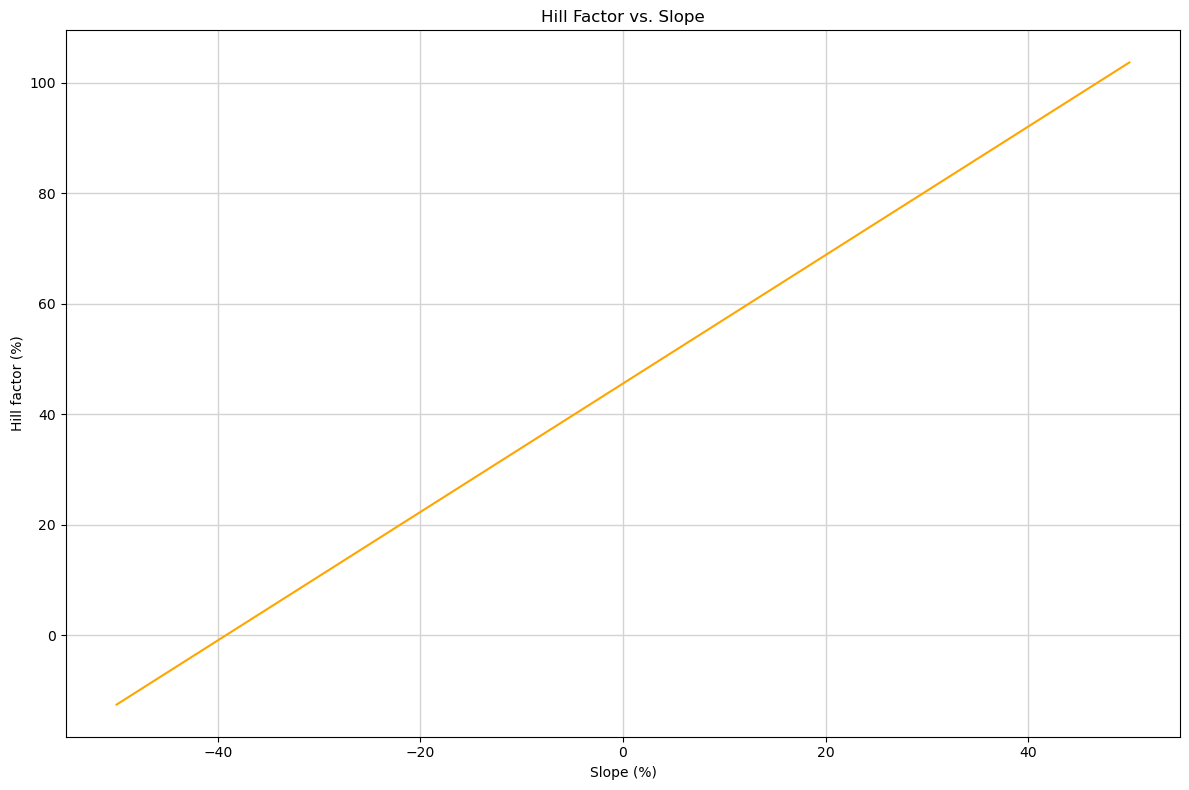

In [5]:
slope = np.arange(-50,55,10)
eta = 1.1622*slope+45.6

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(slope,eta,color='orange')
ax1.set_title('Hill Factor vs. Slope')
ax1.set_xlabel('Slope (%)')
ax1.set_ylabel('Hill factor (%)')
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

### Total Power

$$  {P_{total}} = {P_{base}+P_{drag}+P_{slope}}$$

$$ {P_{total}} = {c}{m}{v} + {\frac{1}{2}}{\rho}{C_{d}}{A}{(v+v_{wind})}^2{v} + {{m}{g}{s}{\eta}{v}} $$

### Solving for V

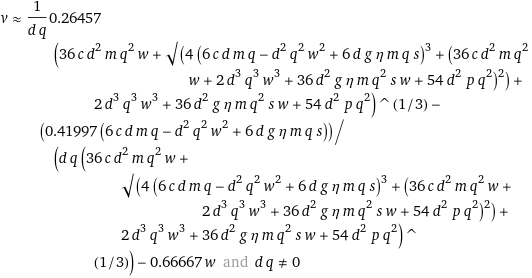

${c}$ is Ecor, ${m}$ is mass, ${d}$ is air density

${q}$ is CdA, ${p}$ is power, ${s}$ is slope

${g}$ is acceleration due to gravity, ${v}$ is running speed, ${w}$ is headwind velocity

${\eta}$ is slope efficiency


### Unmodeled Factors

## Runner Capability Model

- To determine the time a runner can achieve on a race course, a model of their capability is required.

- Here a semi-empirical model of power vs. duration is used.

- The model is grounded in energy systems utilized during running, energy storage, energy intake, and the requirement for sleep.

### Metabolic Power of Fat and Glucose Oxidation

- Fat and glucose are utilized during aerobic exercise. 
    - Here anaerobic contributions are ignored
- The power contributions of fat and glucose vary with exercise intensity
- Conversion of this power to mechanical power is ~25% efficient

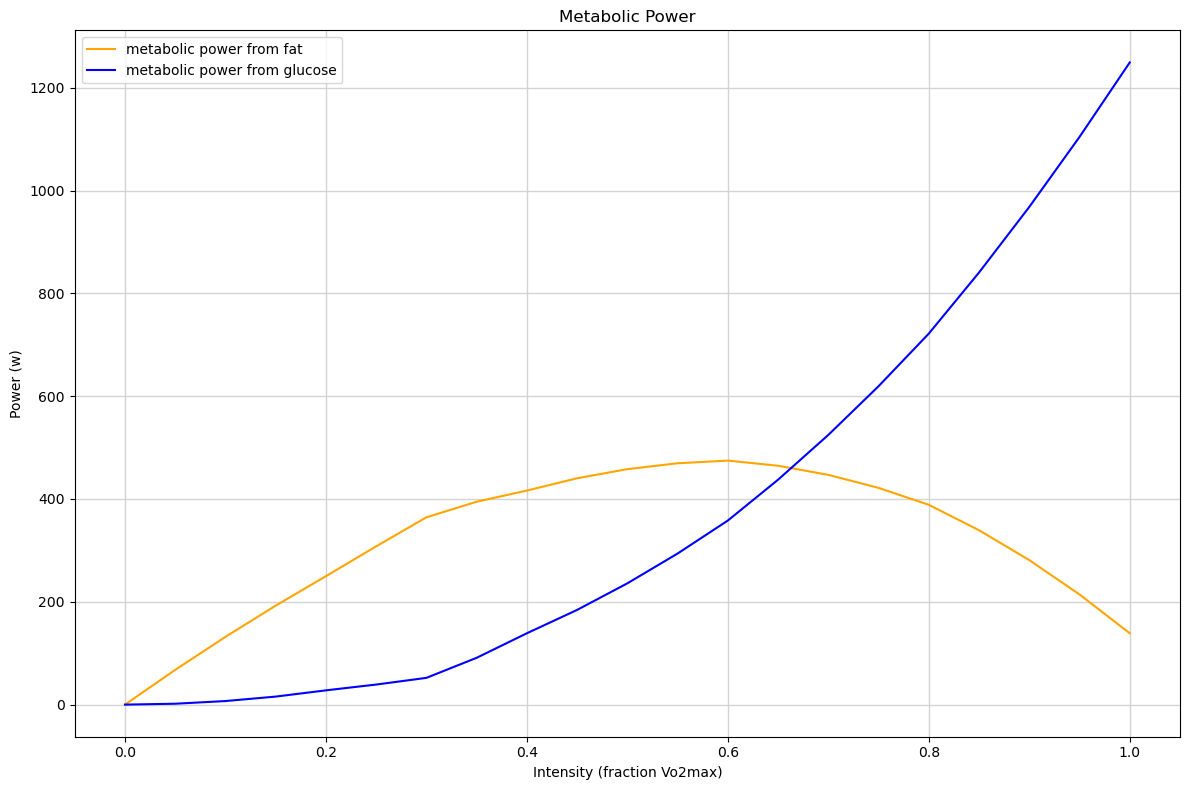

In [6]:
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.fractionVo2,athlete.powerDuration.metabolicPowerFat,color='orange',label='metabolic power from fat')
ax1.plot(athlete.powerDuration.fractionVo2,athlete.powerDuration.metabolicPowerGlucose,color='blue',label='metabolic power from glucose')
ax1.legend()
ax1.set_title('Metabolic Power')
ax1.set_xlabel('Intensity (fraction Vo2max)')
ax1.set_ylabel('Power (w)')
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

### Power - Duration Relationship

- Sustainable power decreases with increasing exercise duration
    - limiting factors include
        - max muscular power output during specific exercise
        - oxygen uptake
        - glycogen stores
        - glucose intake during exercise
        - water intake during exercise
        - hydration level at start of exercise
        - temperature and humidity
        - sleep
        - muscle fatigue
        - injury

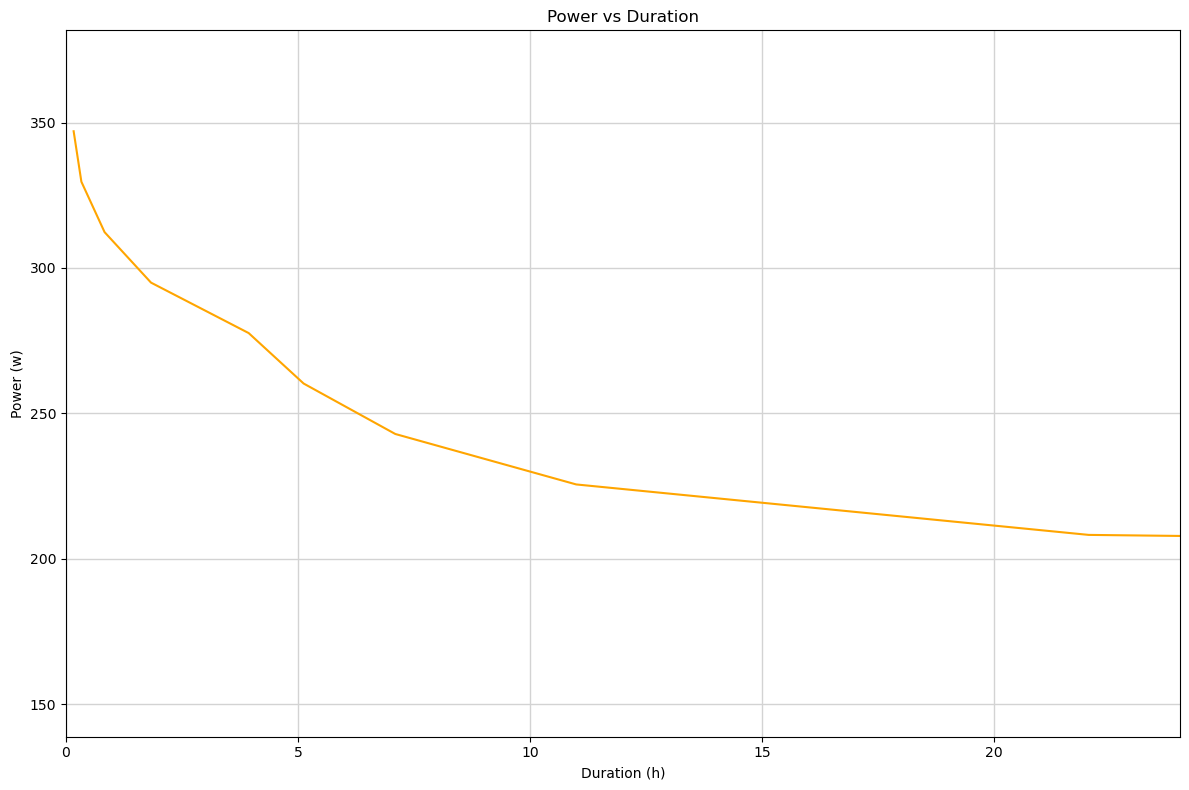

In [7]:
athlete = bonk.Athlete()
athlete.powerDuration.plotPowerDuration()

#### Glycogen Storage

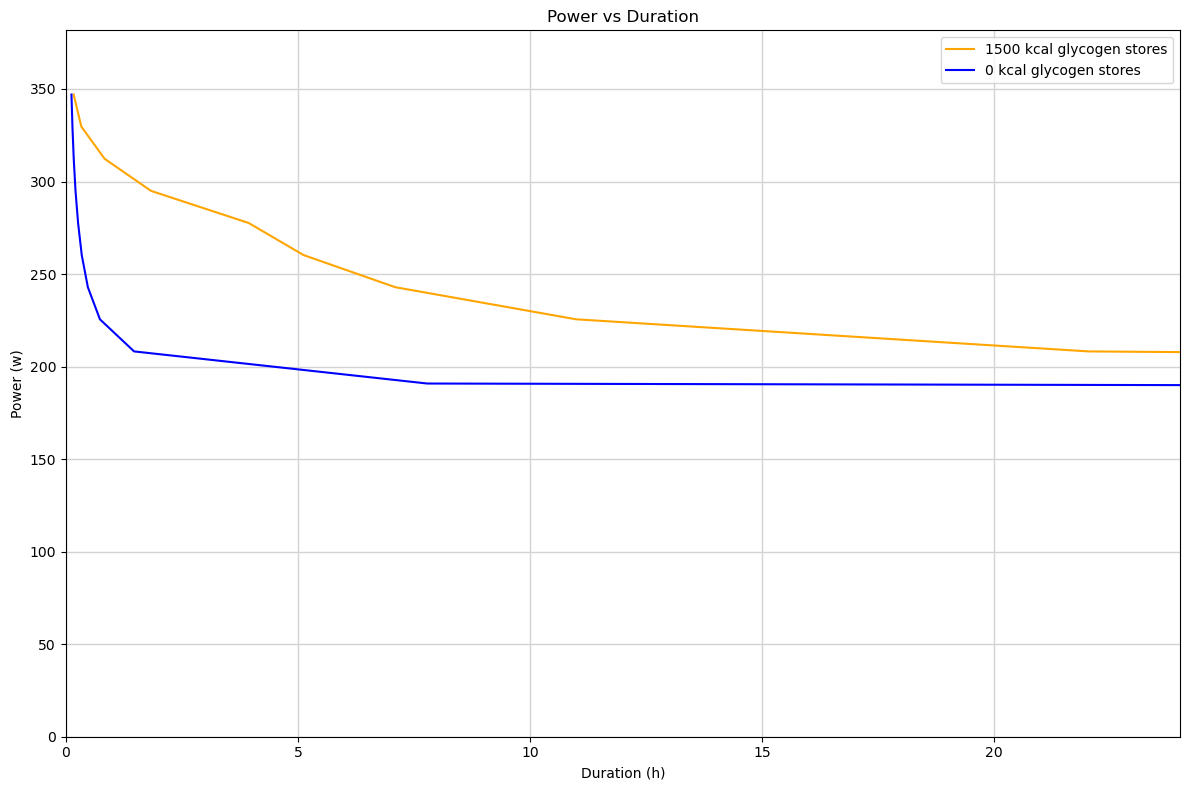

In [8]:
hungryRunner = bonk.Athlete(startingGlycogen=100)

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='orange',label='1500 kcal glycogen stores')
ax1.plot(hungryRunner.powerDuration.duration/3600,hungryRunner.powerDuration.power,color='blue',label='0 kcal glycogen stores')
ax1.legend()
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.vo2maxPower*0,ymax=athlete.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Glucose Intake

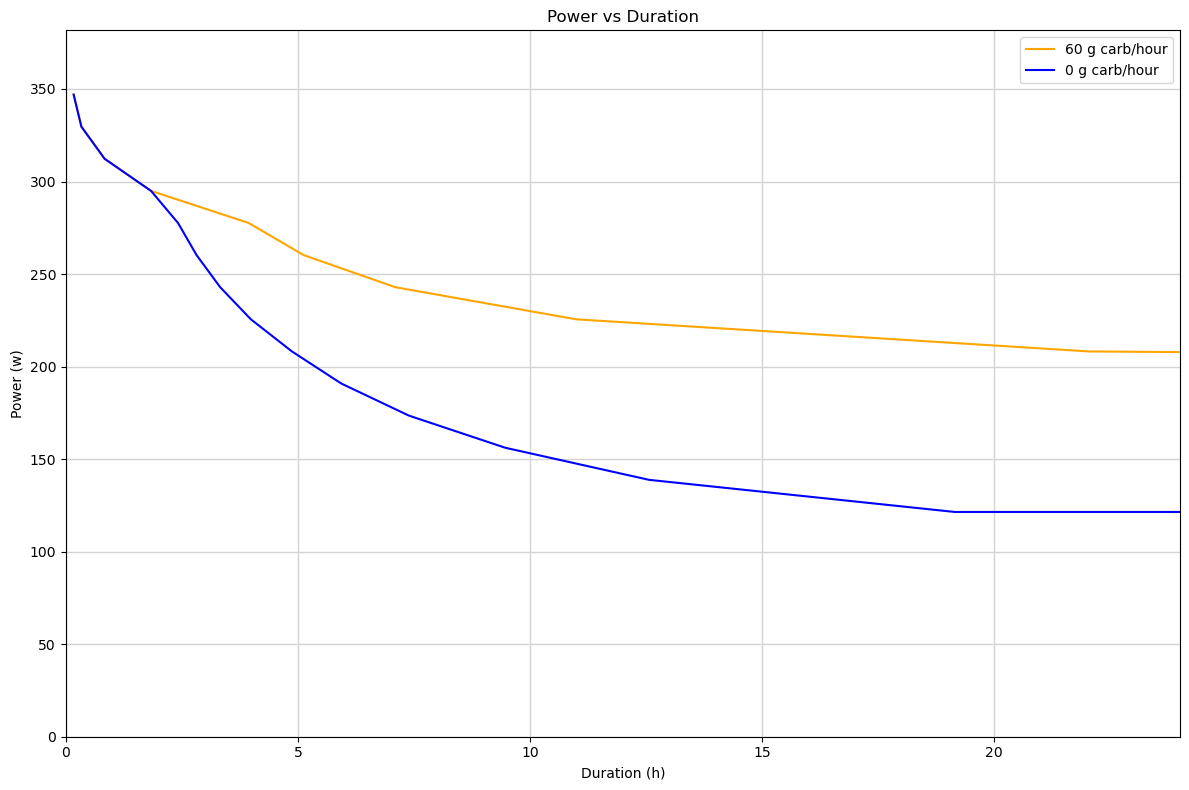

In [9]:
hungryRunner = bonk.Athlete(startingGlycogen=1500,glucoseConsumption = 0)

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='orange',label='60 g carb/hour')
ax1.plot(hungryRunner.powerDuration.duration/3600,hungryRunner.powerDuration.power,color='blue',label='0 g carb/hour')
ax1.legend()
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.vo2maxPower*0,ymax=athlete.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Temperature and Humidity

- Optimal temperature range for marathon is ~ 5 deg C
- A good model for the effect on power - duration is lacking

Insert plot of temperature impact on marthon time

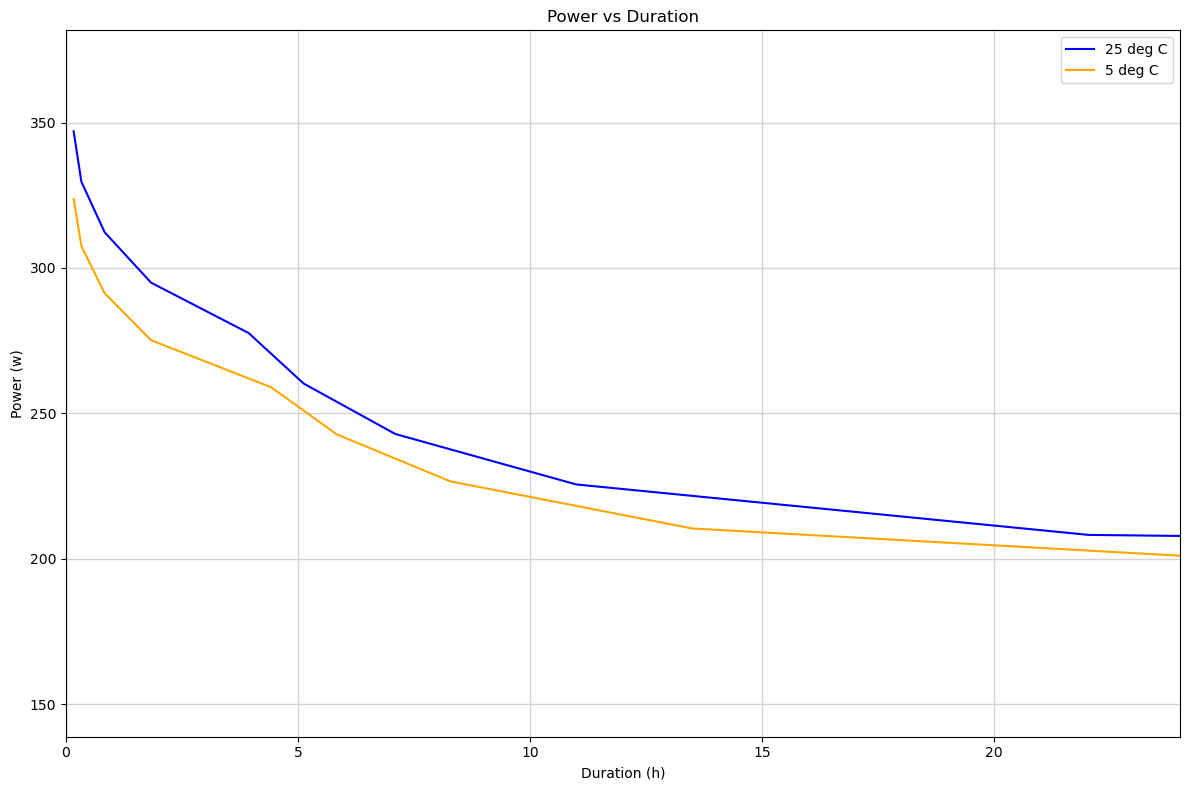

In [10]:
hotAthlete = bonk.Athlete(temp=25)
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='blue', label = '25 deg C')
ax1.plot(hotAthlete.powerDuration.duration/3600,hotAthlete.powerDuration.power,color='orange',label='5 deg C')
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.legend()
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.powerDuration.vo2maxPower*0.4,ymax=athlete.powerDuration.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Altitude

The effect of altitude is to reduce the power output and is modeled here as a simple scaling of the full power - duration curve.

The effect is expected to be full at high power output and lower at lower power outputs, but is modeled as duration independent.

The model also assumes the athlete is acclimated to the race altitude.

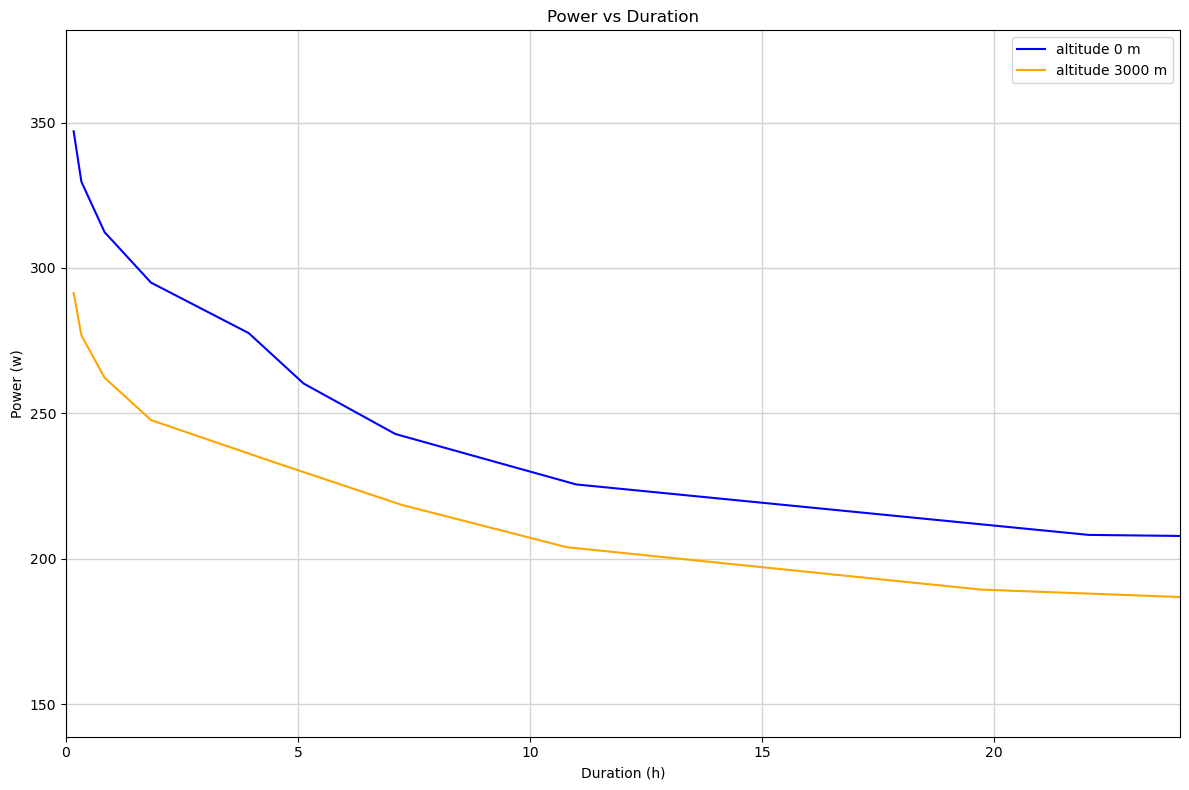

In [11]:
highAthlete = bonk.Athlete(altitude = 3000)
fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(athlete.powerDuration.duration/3600,athlete.powerDuration.power,color='blue', label = 'altitude 0 m')
ax1.plot(highAthlete.powerDuration.duration/3600,highAthlete.powerDuration.power,color='orange',label='altitude 3000 m')
ax1.set_title('Power vs Duration')
ax1.set_xlabel('Duration (h)')
ax1.set_ylabel('Power (w)')
ax1.legend()
ax1.set_xlim(xmin=0,xmax=24)
ax1.set_ylim(ymin=athlete.powerDuration.vo2maxPower*0.4,ymax=athlete.powerDuration.vo2maxPower*1.1)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### Unmodeled Factors



## Race Time Estimation

### Why Even Power is Optimal

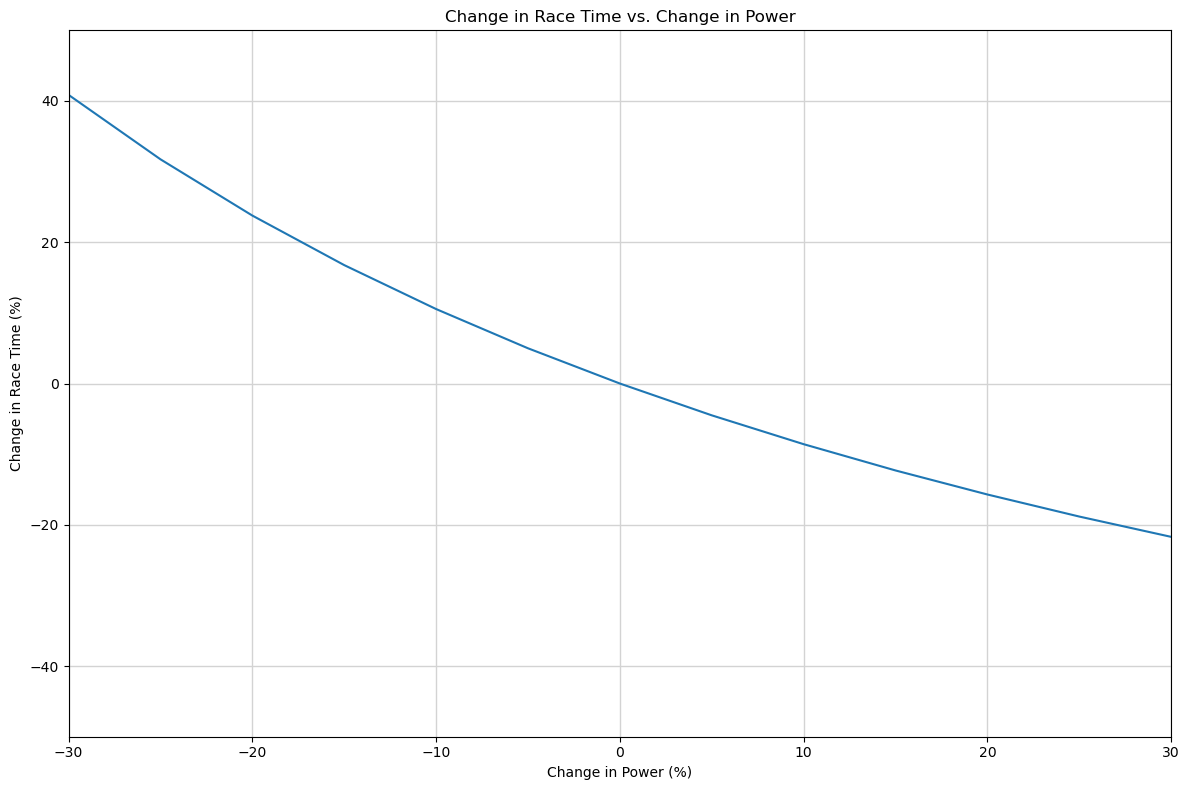

In [12]:
flatCourse = bonk.readCourse('flatMarathon.csv','Flat Marathon')
factors = np.arange(60,145,5)/100
durations = []
for factor in factors:
    power = 250*factor
    segmentPerformances = []
    duration = 0
    for segment in flatCourse.segments:
        segmentPerformance = bonk.SegmentPerformance(segment,athlete,environment,power)
        segmentPerformance.setStart(duration)
        segmentPerformances.append(segmentPerformance)
        duration += segmentPerformance.duration
    durations.append(duration)
    if factor == 1.0:
        normDuration = duration

fig1, ax1 = plt.subplots(figsize=plotSize)
ax1.plot(factors*100-100,(durations/normDuration*100-100))
ax1.set_title('Change in Race Time vs. Change in Power')
ax1.set_xlabel('Change in Power (%)')
ax1.set_ylabel('Change in Race Time (%)')
ax1.set_xlim(xmin=-30, xmax = 30)
ax1.set_ylim(ymin=-50, ymax = 50)
ax1.grid(color='lightgrey', linestyle='-', linewidth=1)
fig1.tight_layout()

#### When to Push and When to Rest

- If you pace unevenly:
    - Increase effort in slow sections (uphill)
    - Decrease effort in fast sections (downhill, flat)

## Example: Flat Marathon

Race time: 02:40:34


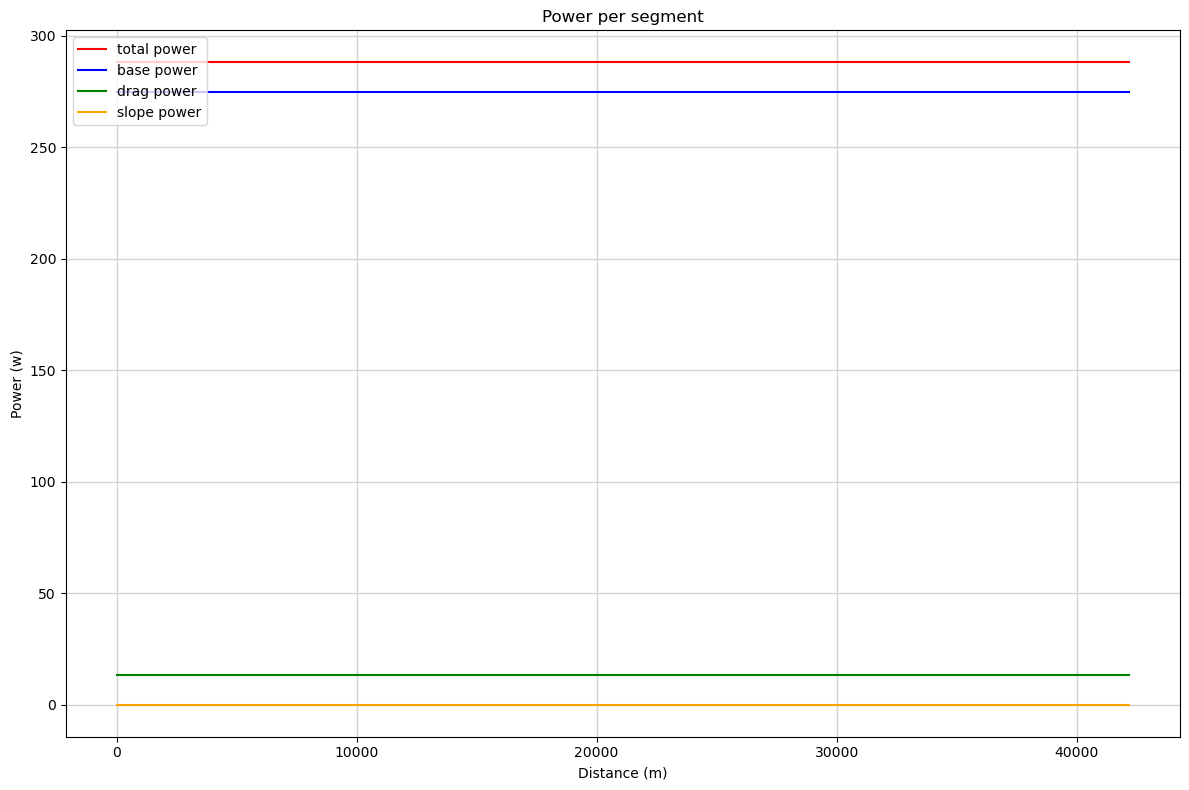

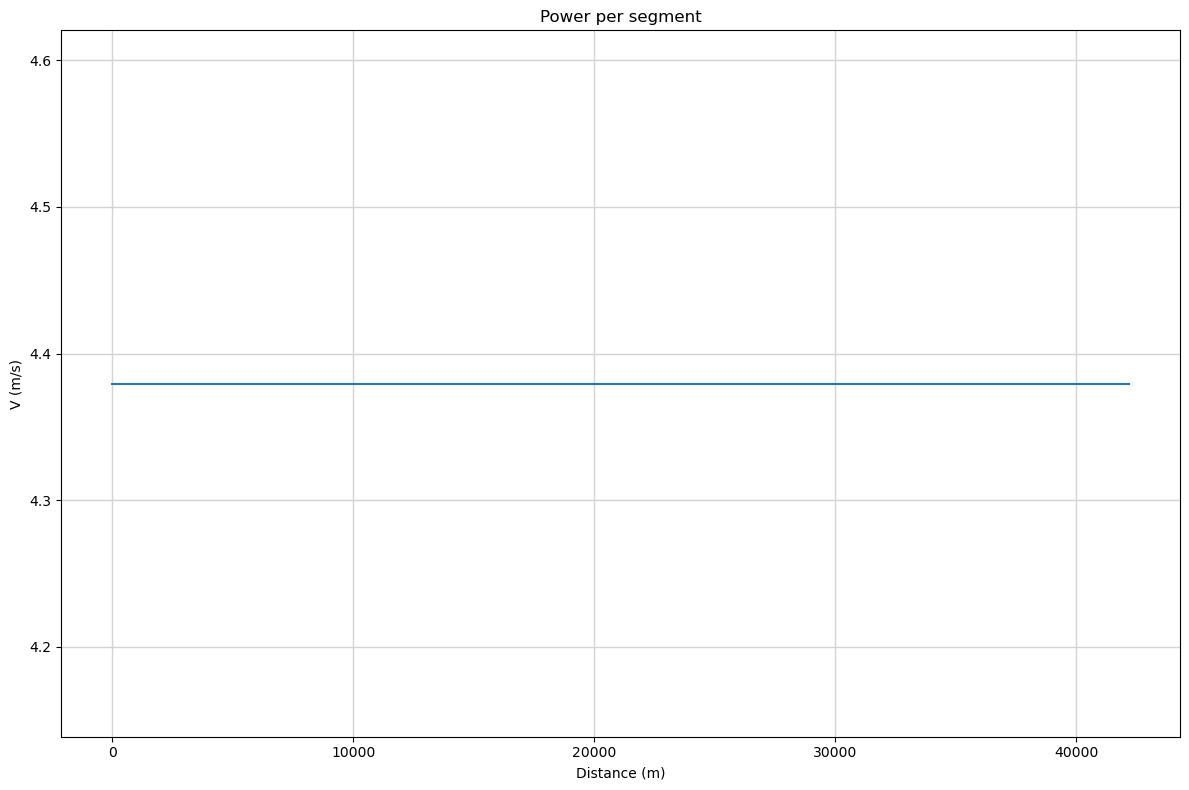

In [13]:
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=347, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
flatPerformance = bonk.Performance(environment,athlete,flatCourse)
raceTime, power = flatPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

flatPerformance.plotPowerDistance()
flatPerformance.plotVDistance()

In [14]:
hotEnvironment = bonk.Environment(temperature = 30)
hotAthlete = bonk.Athlete(temp = hotEnvironment.temperature)
flatPerformance = bonk.Performance(environment,hotAthlete,flatCourse)
raceTimeHot, power = flatPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTimeHot)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

print('Hot race time is ',raceTimeHot/raceTime*100.0, '% of optimal')

Race time: 03:09:28
Hot race time is  117.99783200327003 % of optimal


## Example: Boston Marathon

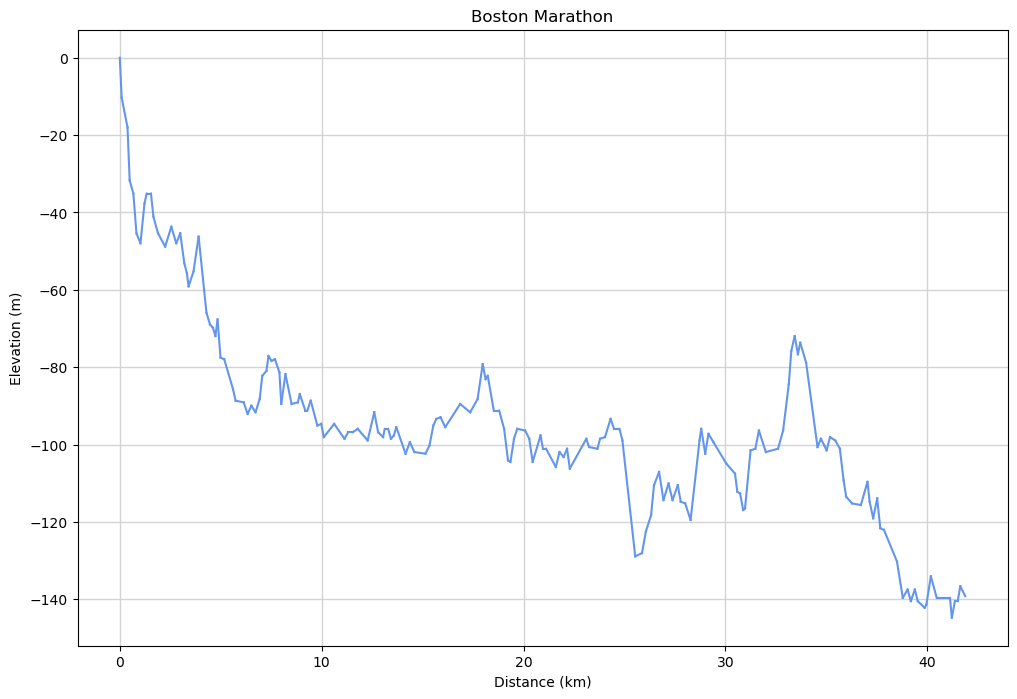

In [15]:
bostonCourse = bonk.readCourse('bostonCourse.csv','Boston Marathon')

bostonCourse.plotProfile()

Race time: 02:38:19
Mile: 01 - 05:44
Mile: 02 - 05:55
Mile: 03 - 05:58
Mile: 04 - 05:49
Mile: 05 - 06:13
Mile: 06 - 06:04
Mile: 07 - 06:03
Mile: 08 - 06:08
Mile: 09 - 06:04
Mile: 10 - 06:12
Mile: 11 - 06:13
Mile: 12 - 05:55
Mile: 13 - 06:13
Mile: 14 - 06:04
Mile: 15 - 06:14
Mile: 16 - 05:42
Mile: 17 - 06:23
Mile: 18 - 06:22
Mile: 19 - 05:58
Mile: 20 - 06:19
Mile: 21 - 06:35
Mile: 22 - 05:48
Mile: 23 - 05:58
Mile: 24 - 05:48
Mile: 25 - 06:08
Mile: 26 - 06:05


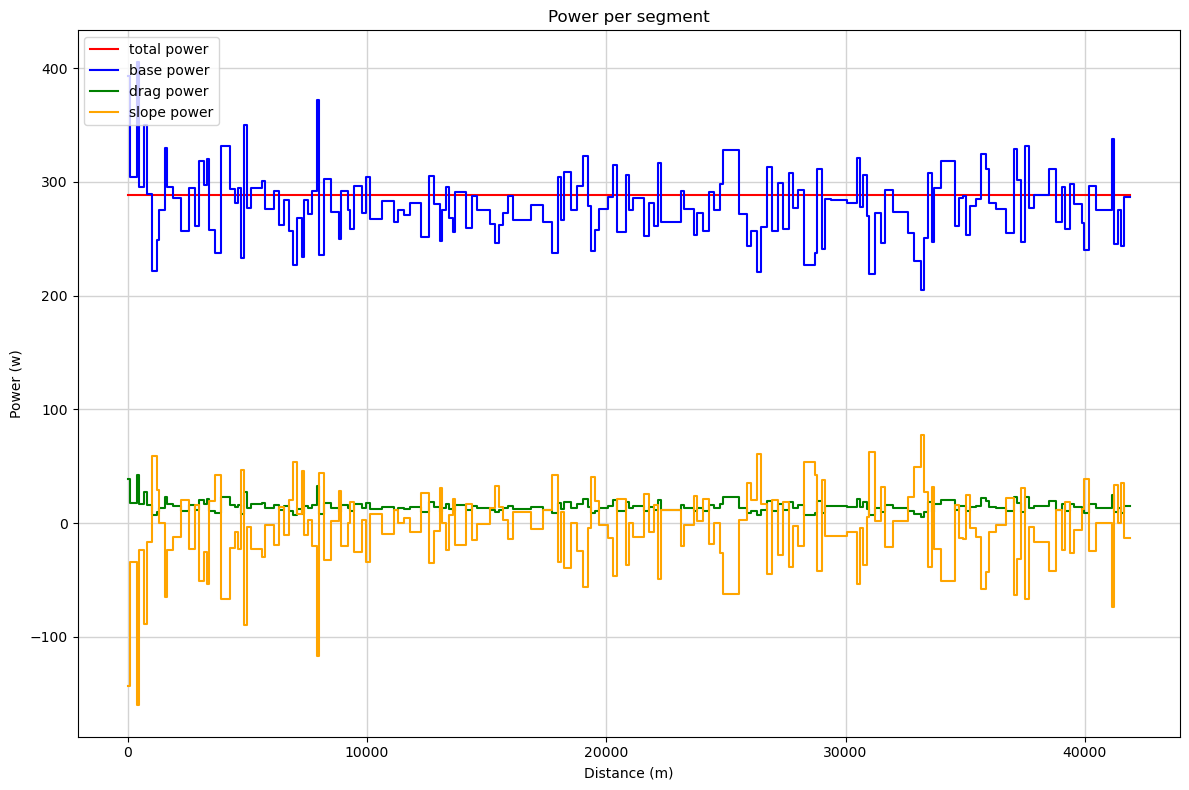

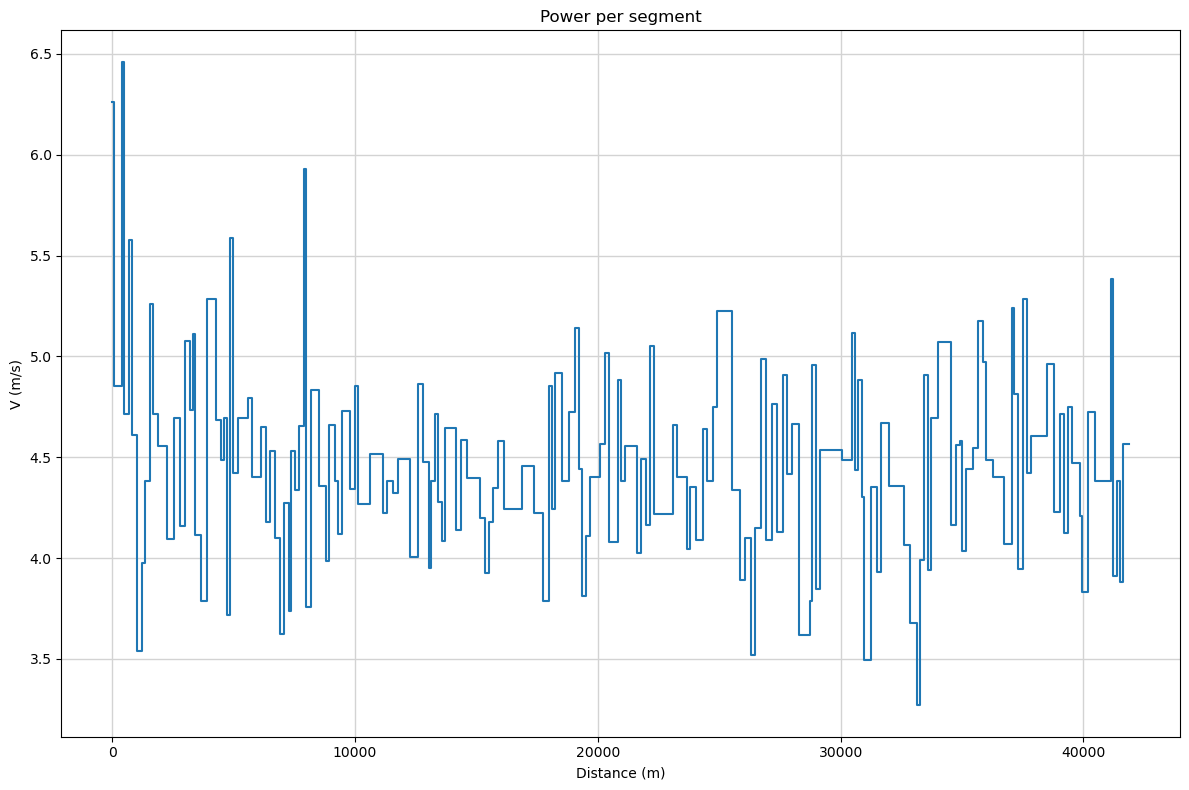

In [16]:
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
athlete = bonk.Athlete(mass = 64, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.42*64, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)
bostonPerformance = bonk.Performance(environment,athlete,bostonCourse)
raceTime, power = bostonPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))



bostonPerformance.plotPowerDistance()
bostonPerformance.plotVDistance()

bostonPerformance.getMileSplits()

## Example: Ouray 100M

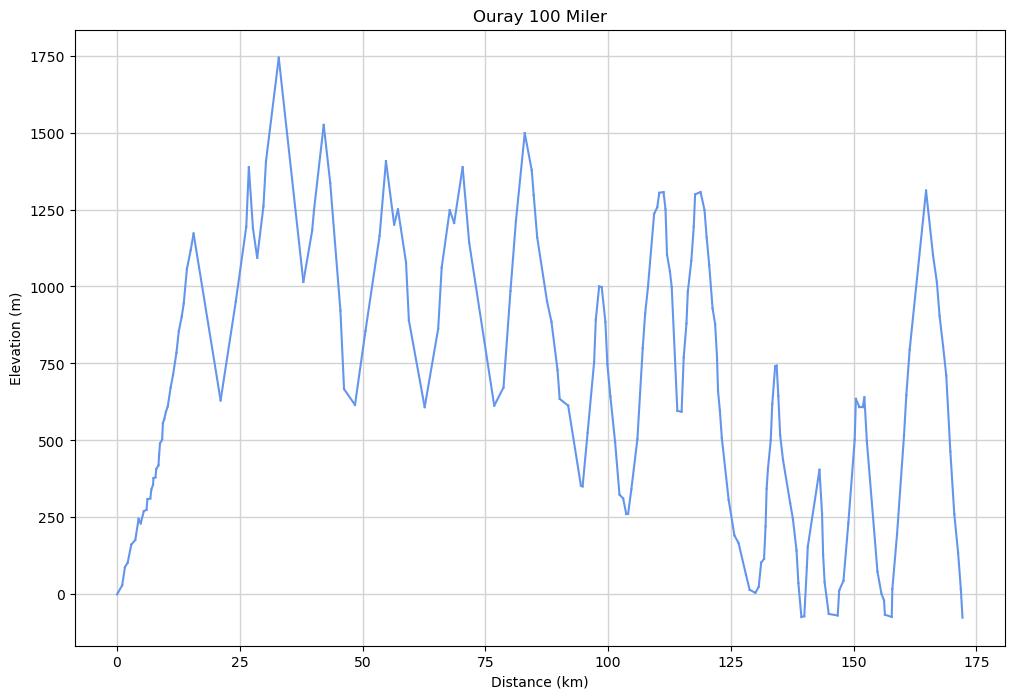

In [17]:
ourayCourse = bonk.readCourse('ourayCourse.csv','Ouray 100 Miler')

ourayCourse.plotProfile()

Race time: 30:53:51


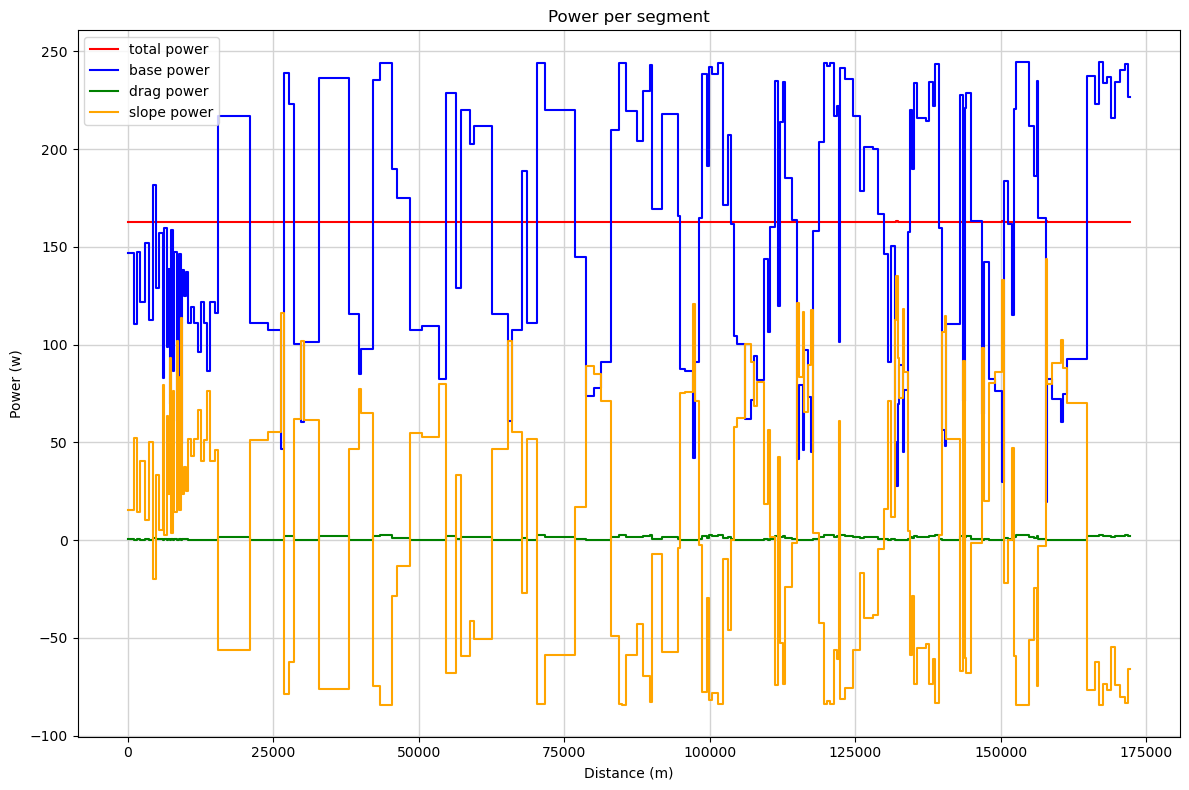

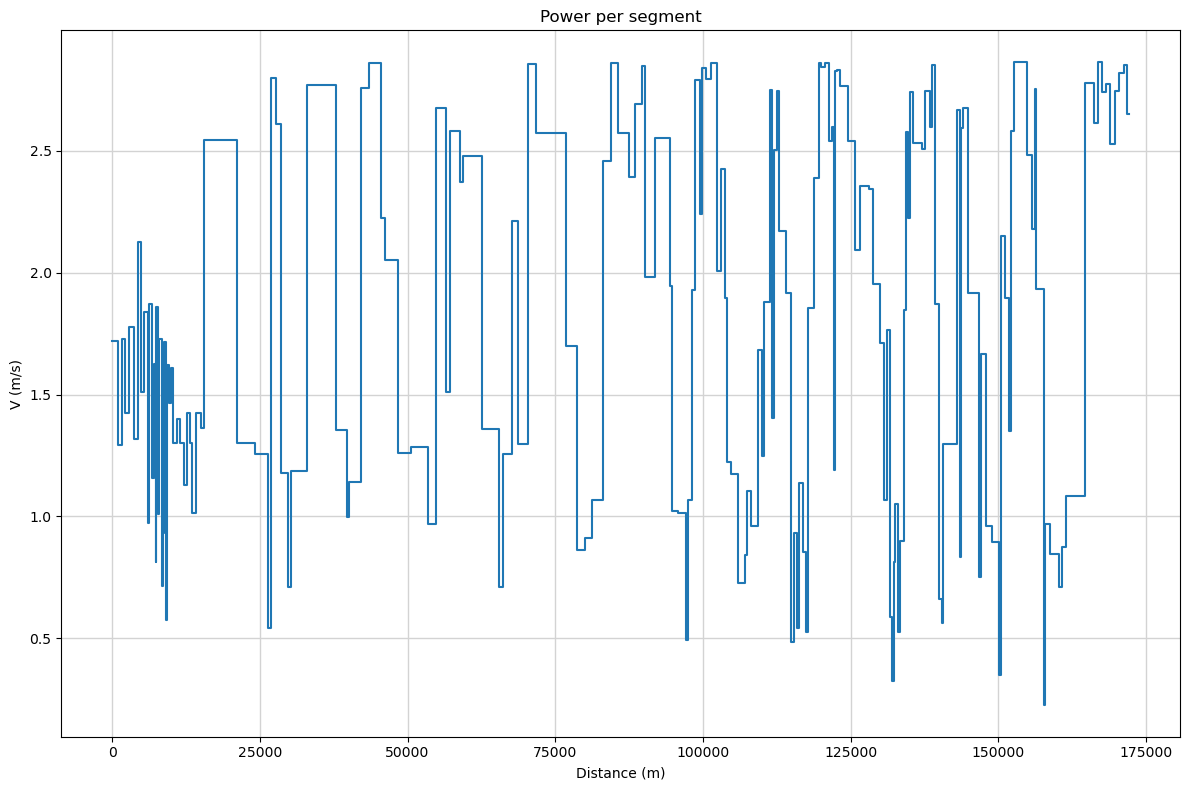

In [18]:
environment = bonk.Environment(temperature = 25, humidity = 0, wind = 0, altitude = 3000, body = 1)
athlete = bonk.Athlete(mass = 67, Ecor = 0.98*1.3, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=347*0.95, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature, altitude = environment.altitude)

ourayPerformance = bonk.Performance(environment,athlete,ourayCourse)
raceTime, power = ourayPerformance.getRaceTime()
h, m, s = bonk.getTime(raceTime)
out = 'Race time: {:02d}:{:02d}:{:02d}'
print(out.format(int(h),int(m),int(s)))

ourayPerformance.plotPowerDistance()
ourayPerformance.plotVDistance()

## World Record Prediction

Given typical values of the fastest distance runners and ideal flat race conditions, what do we expect race times to be?

In [19]:
fivek = bonk.readCourse('5k.csv','5k')
tenk = bonk.readCourse('10k.csv','10k')
half = bonk.readCourse('21k.csv','half marathon')
full = bonk.readCourse('flatMarathon.csv','full marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
eliteAthlete = bonk.Athlete(mass = 57, Ecor = 0.95, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=6.35*57*1.13, glucoseConsumption = 80, startingGlycogen = 1500,temp=environment.temperature)

distances = [fivek, tenk, half, full]

for distance in distances:
    performance = bonk.Performance(environment,eliteAthlete,distance)
    raceTime, power = performance.getRaceTime()
    h, m, s = bonk.getTime(raceTime)
    out = '{} race time: {:02d}:{:02d}:{:02d}'
    print(out.format(distance.name,int(h),int(m),int(s)))


5k race time: 00:12:36
10k race time: 00:26:15
half marathon race time: 00:57:45
full marathon race time: 02:01:05


Real records

5k 	   0:12:35 	Joshua Cheptegei

10k	   0:26:11 	Joshua Cheptegei

Half   0:57:31     Jacob Kiplimo

Full   2:01:09	    Eliud Kipchoge

### Impact of high performance foams in running shoes

High performance foams have been shown to improve running economy by ~2% in elite runners.
- Better foams are softer with higher energy return (~87% vs ~60%)
    - Allows runner to maintain higher leg stiffness while maintaining same limiting ground contact force
    - Reduced mechanical work
- The impact is near zero in track events with low stack heights and cushioned surfaces

What would world records be before these foams were used (starting in 2017)?

In [20]:
fivek = bonk.readCourse('5k.csv','5k')
tenk = bonk.readCourse('10k.csv','10k')
half = bonk.readCourse('21k.csv','half marathon')
full = bonk.readCourse('flatMarathon.csv','full marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
eliteAthlete = bonk.Athlete(mass = 57, Ecor = 0.95*1.02, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=6.35*57*1.13, glucoseConsumption = 80, startingGlycogen = 1500,temp=environment.temperature)

distances = [fivek, tenk, half, full]

for distance in distances:
    performance = bonk.Performance(environment,eliteAthlete,distance)
    raceTime, power = performance.getRaceTime()
    h, m, s = bonk.getTime(raceTime)
    out = '{} race time: {:02d}:{:02d}:{:02d}'
    print(out.format(distance.name,int(h),int(m),int(s)))

5k race time: 00:12:48
10k race time: 00:26:39
half marathon race time: 00:58:40
full marathon race time: 02:03:04


Real records before 2017

5k 0:12:37 Kenenisa Bekele

10k 0:26:17 Kenenisa Bekele

Half 0:58:23 Zersenay Tadese

Full 2:02:57 Dennis Kimetto



## Personal Records

The model predicts my own personal records within ~1%

In [22]:
fivek = bonk.readCourse('5k.csv','5k')
tenk = bonk.readCourse('10k.csv','10k')
half = bonk.readCourse('21k.csv','half marathon')
full = bonk.readCourse('flatMarathon.csv','full marathon')
environment = bonk.Environment(temperature = 5, humidity = 0, wind = 0, altitude = 0, body = 1)
jack = bonk.Athlete(mass = 63, Ecor = 0.98, fatigueResistanceCoef = 0.07, Cd = 0.5, frontalArea = 0.5, vo2maxPower=5.5*63, glucoseConsumption = 60, startingGlycogen = 1500,temp=environment.temperature)

distances = [fivek, tenk, half, full]

for distance in distances:
    performance = bonk.Performance(environment,jack,distance)
    raceTime, power = performance.getRaceTime()
    h, m, s = bonk.getTime(raceTime)
    out = '{} race time: {:02d}:{:02d}:{:02d}'
    print(out.format(distance.name,int(h),int(m),int(s)))

5k race time: 00:16:21
10k race time: 00:34:01
half marathon race time: 01:15:17
full marathon race time: 02:38:26
